# Analiza DFT 1D z Transformatą Odwrotną Fouriera i DCT

Ten notatnik demonstruje Dyskretną Transformatę Fouriera (DFT), Transformatę Odwrotną Fouriera (IFT) oraz Dyskretną Transformatę Cosinus (DCT) dla sygnałów 1D, z analizą częstotliwości Nyquista i złożoności obliczeniowej.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Generowanie sygnału

Najpierw utworzymy sygnał złożony z wieloma składowymi częstotliwościowymi, aby zademonstrować analizę DFT i DCT.


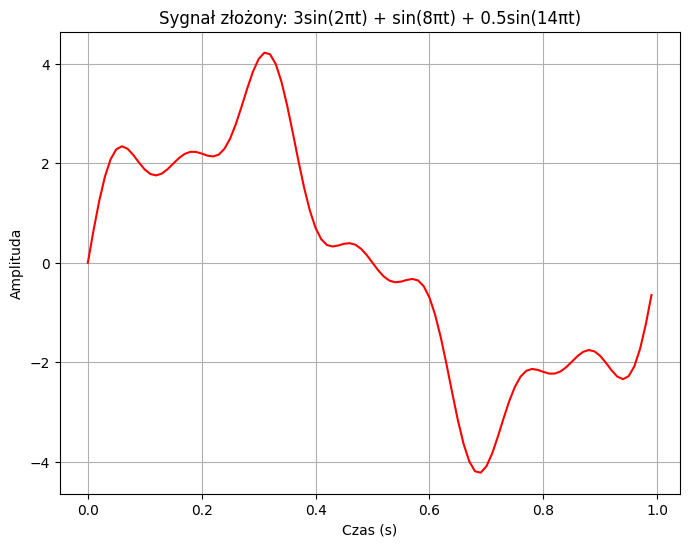

In [2]:
# częstotliwość próbkowania
sr = 100
# interwał próbkowania
ts = 1.0/sr
t = np.arange(0,1,ts)

# Składowe częstotliwościowe
freq1 = 1.
x = 3*np.sin(2*np.pi*freq1*t)

freq2 = 4
x += np.sin(2*np.pi*freq2*t)

freq3 = 7   
x += 0.5* np.sin(2*np.pi*freq3*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplituda')
plt.xlabel('Czas (s)')
plt.title('Sygnał złożony: 3sin(2πt) + sin(8πt) + 0.5sin(14πt)')
plt.grid(True)
plt.show()

## Implementacja DFT

Teraz zaimplementujemy funkcję Dyskretnej Transformacji Fouriera i przeanalizujemy sygnał.


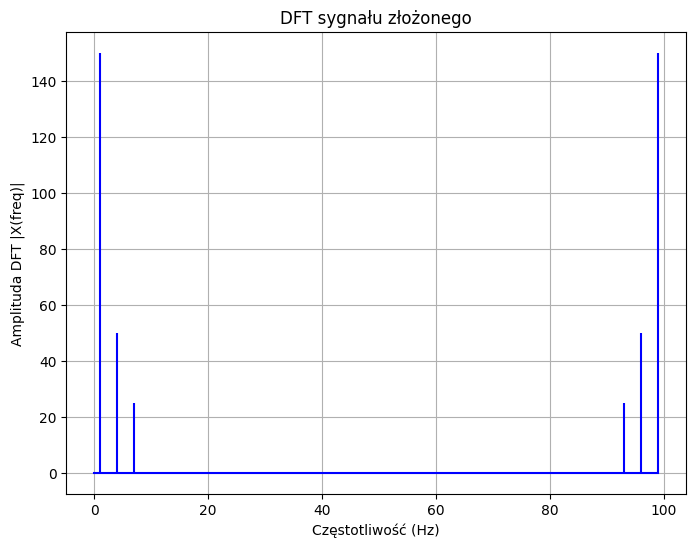

In [3]:
def DFT(x):
    """
    Funkcja do obliczania Dyskretnej Transformacji Fouriera
    sygnału rzeczywistego 1D x
    
    Złożoność czasowa: O(N²)
    Złożoność pamięciowa: O(N)
    """
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

X = DFT(x)

# Obliczanie częstotliwości
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', 
         markerfmt=" ", basefmt="-b")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda DFT |X(freq)|')
plt.title('DFT sygnału złożonego')
plt.grid(True)

## Implementacja IFT (Inverse Fourier Transform)

Teraz zaimplementujemy Transformatę Odwrotną Fouriera, aby odtworzyć oryginalny sygnał z jego reprezentacji częstotliwościowej.


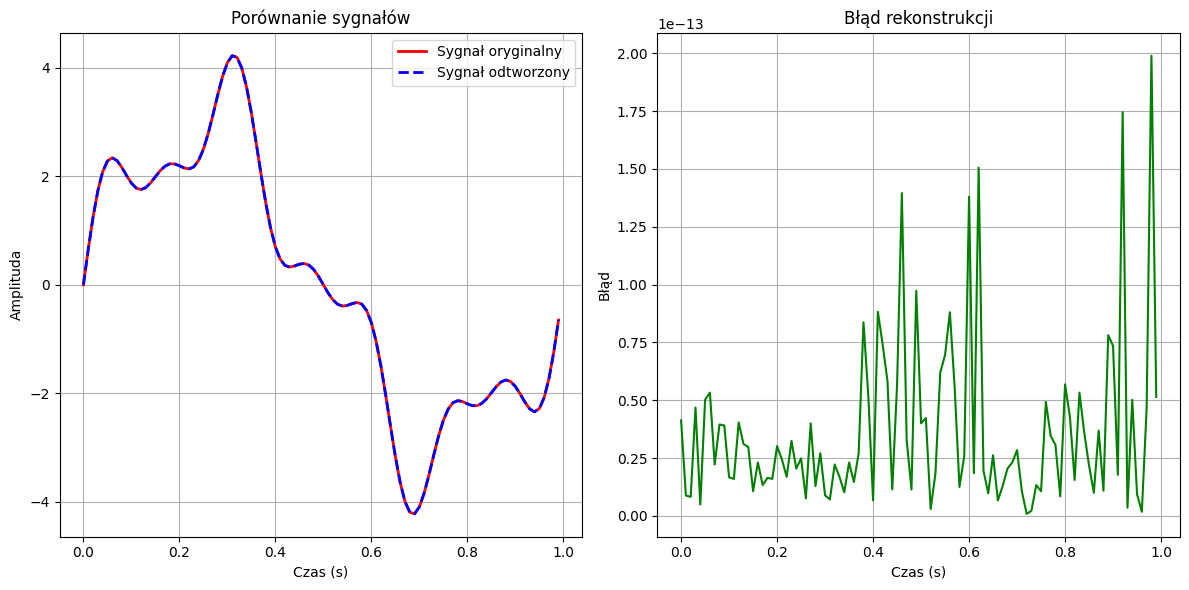

Średni błąd rekonstrukcji: 3.63e-14


In [4]:
def IFT(X):
    """
    Funkcja do obliczania Odwrotnej Transformacji Fouriera
    z reprezentacji częstotliwościowej X
    
    Złożoność czasowa: O(N²)
    Złożoność pamięciowa: O(N)
    """
    N = len(X)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    
    x = np.dot(e, X) / N
    
    return x

x_reconstructed = IFT(X)

# Porównanie oryginalnego i odtworzonego sygnału
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.plot(t, x, 'r', label='Sygnał oryginalny', linewidth=2)
plt.plot(t, x_reconstructed.real, 'b--', label='Sygnał odtworzony', linewidth=2)
plt.ylabel('Amplituda')
plt.xlabel('Czas (s)')
plt.title('Porównanie sygnałów')
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(t, np.abs(x - x_reconstructed.real), 'g')
plt.ylabel('Błąd')
plt.xlabel('Czas (s)')
plt.title('Błąd rekonstrukcji')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Średni błąd rekonstrukcji: {np.mean(np.abs(x - x_reconstructed.real)):.2e}")

## Analiza częstotliwości Nyquista

Częstotliwość Nyquista to połowa częstotliwości próbkowania (fs/2) i określa maksymalną częstotliwość, którą można prawidłowo odtworzyć z próbkowanego sygnału.


Częstotliwość próbkowania: 100 Hz
Częstotliwość Nyquista: 50.0 Hz


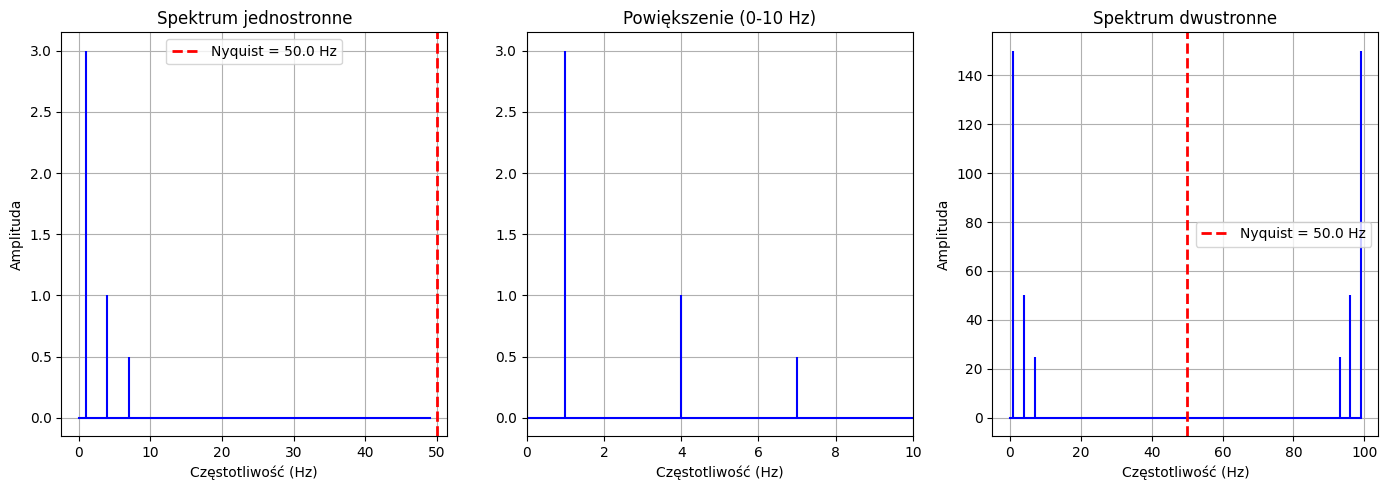

In [5]:
nyquist_freq = sr / 2
print(f"Częstotliwość próbkowania: {sr} Hz")
print(f"Częstotliwość Nyquista: {nyquist_freq} Hz")

# Jednostronne spektrum (do częstotliwości Nyquista)
n_oneside = N//2
f_oneside = freq[:n_oneside]
X_oneside = X[:n_oneside]/n_oneside

plt.figure(figsize = (14, 5))
plt.subplot(131)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')
plt.title('Spektrum jednostronne')
plt.axvline(x=nyquist_freq, color='r', linestyle='--', linewidth=2, label=f'Nyquist = {nyquist_freq} Hz')
plt.legend()
plt.grid(True)

plt.subplot(132)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Częstotliwość (Hz)')
plt.xlim(0, 10)
plt.title('Powiększenie (0-10 Hz)')
plt.axvline(x=nyquist_freq, color='r', linestyle='--', linewidth=2)
plt.grid(True)

plt.subplot(133)
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')
plt.title('Spektrum dwustronne')
plt.axvline(x=nyquist_freq, color='r', linestyle='--', linewidth=2, label=f'Nyquist = {nyquist_freq} Hz')
plt.legend()
plt.grid(True)
plt.tight_layout()

## Implementacja DCT (Discrete Cosine Transform)

DCT jest podobna do DFT, ale używa tylko funkcji cosinus zamiast funkcji wykładniczych zespolonych. Jest szeroko stosowana w kompresji obrazów (JPEG) i dźwięku (MP3).


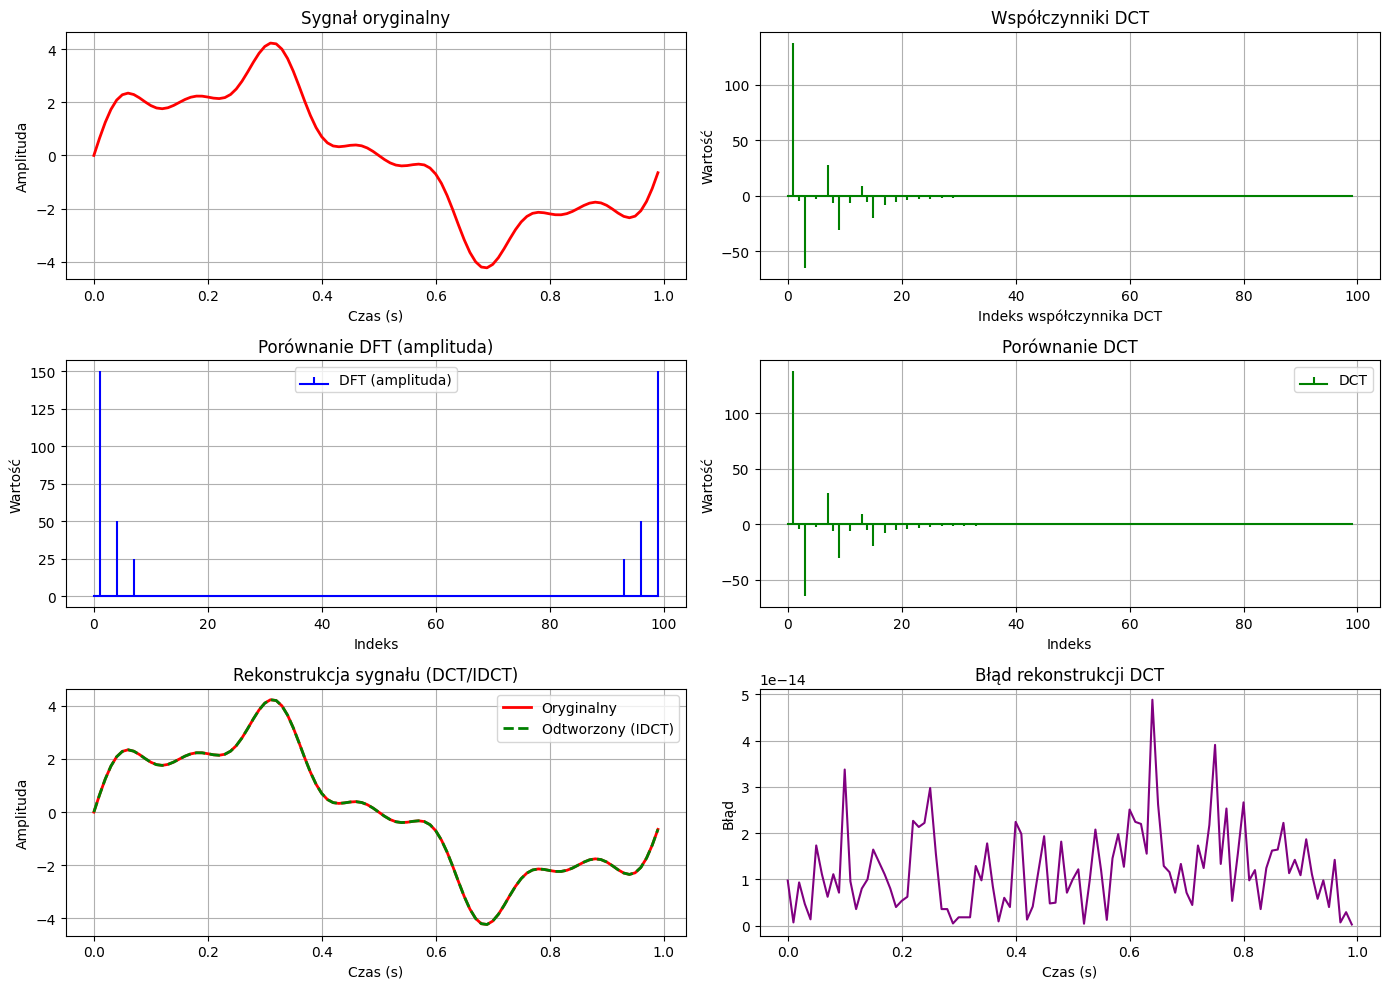

Średni błąd rekonstrukcji DCT: 1.21e-14


In [6]:
def DCT(x):
    """
    Funkcja do obliczania Dyskretnej Transformacji Cosinus (DCT-II)
    sygnału rzeczywistego 1D x
    
    Złożoność czasowa: O(N²)
    Złożoność pamięciowa: O(N)
    """
    N = len(x)
    X_dct = np.zeros(N)
    
    for k in range(N):
        sum_val = 0.0
        for n in range(N):
            sum_val += x[n] * np.cos(np.pi * k * (2*n + 1) / (2*N))
        X_dct[k] = sum_val
    
    return X_dct

def IDCT(X_dct):
    """
    Funkcja do obliczania Odwrotnej Transformacji Cosinus (IDCT)
    
    Złożoność czasowa: O(N²)
    Złożoność pamięciowa: O(N)
    """
    N = len(X_dct)
    x = np.zeros(N)
    
    for n in range(N):
        sum_val = X_dct[0] / 2.0
        for k in range(1, N):
            sum_val += X_dct[k] * np.cos(np.pi * k * (2*n + 1) / (2*N))
        x[n] = 2.0 * sum_val / N
    
    return x

X_dct = DCT(x)
x_reconstructed_dct = IDCT(X_dct)

# Wizualizacja
plt.figure(figsize=(14, 10))

# Sygnał oryginalny
plt.subplot(321)
plt.plot(t, x, 'r', linewidth=2)
plt.xlabel('Czas (s)')
plt.ylabel('Amplituda')
plt.title('Sygnał oryginalny')
plt.grid(True)

# Współczynniki DCT
plt.subplot(322)
plt.stem(range(len(X_dct)), X_dct, 'g', markerfmt=" ", basefmt="-g")
plt.xlabel('Indeks współczynnika DCT')
plt.ylabel('Wartość')
plt.title('Współczynniki DCT')
plt.grid(True)

# Porównanie DFT i DCT
plt.subplot(323)
plt.stem(range(len(X_dct)), abs(X), 'b', markerfmt=" ", basefmt="-b", label='DFT (amplituda)')
plt.xlabel('Indeks')
plt.ylabel('Wartość')
plt.title('Porównanie DFT (amplituda)')
plt.legend()
plt.grid(True)

plt.subplot(324)
plt.stem(range(len(X_dct)), X_dct, 'g', markerfmt=" ", basefmt="-g", label='DCT')
plt.xlabel('Indeks')
plt.ylabel('Wartość')
plt.title('Porównanie DCT')
plt.legend()
plt.grid(True)

# Rekonstrukcja
plt.subplot(325)
plt.plot(t, x, 'r', label='Oryginalny', linewidth=2)
plt.plot(t, x_reconstructed_dct, 'g--', label='Odtworzony (IDCT)', linewidth=2)
plt.xlabel('Czas (s)')
plt.ylabel('Amplituda')
plt.title('Rekonstrukcja sygnału (DCT/IDCT)')
plt.legend()
plt.grid(True)

# Błąd rekonstrukcji
plt.subplot(326)
plt.plot(t, np.abs(x - x_reconstructed_dct), 'purple')
plt.xlabel('Czas (s)')
plt.ylabel('Błąd')
plt.title('Błąd rekonstrukcji DCT')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Średni błąd rekonstrukcji DCT: {np.mean(np.abs(x - x_reconstructed_dct)):.2e}")

## Analiza złożoności obliczeniowej DFT i DCT

### **Złożoność czasowa:**

| Transformacja | Złożoność | Opis |
|---------------|-----------|------|
| **DFT** | O(N²) | Naiwna implementacja - podwójna pętla |
| **DCT** | O(N²) | Podobnie jak DFT |
| **FFT** | O(N log N) | Zoptymalizowana implementacja - znacznie szybsza |
| **IFT** | O(N²) | Odwrotna transformacja do DFT |
| **IDCT** | O(N²) | Odwrotna transformacja cosinus |

### **Złożoność pamięciowa:**

- **DFT/IFT**: O(N) - przechowuje N współczynników zespolonych
- **DCT/IDCT**: O(N) - przechowuje N współczynników rzeczywistych  
- **FFT**: O(N) - optymalizowana pamięciowo

### **Zastosowania:**

- **DFT/FFT**: Analiza częstotliwości, filtrowanie, przetwarzanie sygnałów
- **DCT**: Kompresja JPEG, MP3, kodowanie wideo (MPEG)
- **IFT/IDCT**: Rekonstrukcja sygnału z dziedziny częstotliwości
